In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,dsfont}')

In [2]:
#loading data for active neurons
D=np.loadtxt('ActiveNodeDensity.txt')

# time
t=D[:,0]

# excitatory
NE=D[:,1]

# inhibitory
NI=D[:,2]

Rho=NE+NI

(0.0, 1000.0)

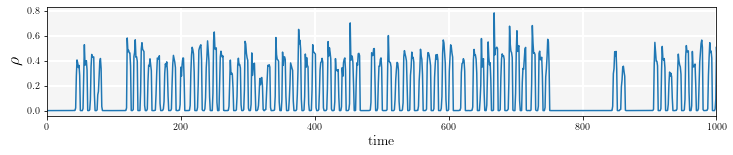

In [6]:
# Plotting fraction of active neurons (\rho) as a function of time
fig, ax=plt.subplots(figsize=(12,2), facecolor='white')
ax.set_facecolor('whitesmoke')
gs=GridSpec(8,15)

plt.plot(t,Rho, lw = 1.5)
plt.xlabel('time',fontsize=14, rotation=0)
plt.ylabel(r'$\rho$',fontsize=18, rotation=90)
plt.grid(color = 'white', linestyle = '-', linewidth = 2)
plt.xlim(0,1000)

Text(0, 0.5, 'power spectrum')

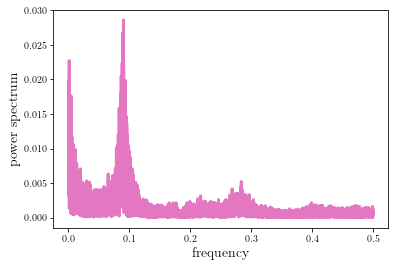

In [7]:
# Plotting the power spectrum of the network activity (\rho)
# Notice! Here for a correct result, set tmax more than 20000 in the C++ code

from numpy.fft import fft, ifft

L=len(t)
Fs = 1  #sampling frequency
Y=fft(Rho)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L
plt.plot(f[1:-2],P1[1:-2], color='C6', lw=3)
plt.xlabel('frequency',fontsize=14, rotation=0)
plt.ylabel('power spectrum',fontsize=14, rotation=90)

In [8]:
# Finding start and end points of each activity cycle
threshold=min(Rho)
precision=0.05
flag=False
i=0
startlocs=[]
endlocs=[]
tmax=max(t)
while i<(tmax-10):
    if ( Rho[i]-threshold <= precision ):
        i=i+1
        continue
    first=i
    if (Rho[i-1] < Rho[i] ):
        first=first-1
    startlocs.append(first)
    flag=True
    while(flag):
        i=i+1
        if ( Rho[i]-threshold <= precision ):
            flag=False
    endlocs.append(i)
    i=i+1;

    
## periods of all activity cycles 
periodsIntSpe=[]
x1=np.arange(0,(len(startlocs)-1))
for i in x1:
    periodsIntSpe.append(startlocs[i+1]-startlocs[i])
    

## maximum values of all activity cycles
maxisIntSpe=[]
timeMax=[]
x2=np.arange(0,len(startlocs))
for i in x2:
    interval=Rho[startlocs[i]:endlocs[i]]
    m=max(interval)
    maxisIntSpe.append(interval.argmax()+startlocs[i])
    #timeMax.append(Rho[startlocs[i]:endlocs[i]].argmax(m))
    
    
## minimum values of all activity cycles
minsIntSpe=[]
x3=np.arange(0,(len(startlocs)-1))
for i in x3: 
    minsIntSpe.append(min(Rho[startlocs[i]:endlocs[i+1]]))

    
## amplitudes of all activity cycles
ampsIntSpe=[]
x3=np.arange(0,(len(maxisIntSpe)-1))
for i in x3: 
    ampsIntSpe.append(maxisIntSpe[i]-minsIntSpe[i])
    
    
## width of all activity cycles
widthesIntSpe=[]
x4=np.arange(0,len(startlocs))
for i in x4: 
    widthesIntSpe.append(endlocs[i]-startlocs[i])

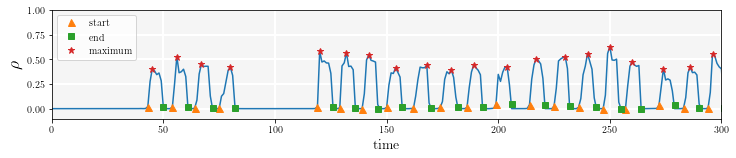

In [13]:
# Plotting Rho with start, end, and maximum values of its activity cycles
fig, ax=plt.subplots(figsize=(12,2), facecolor='white')
ax.set_facecolor('whitesmoke')
gs=GridSpec(8,15)

plt.plot(t,Rho, lw = 1.5)
plt.xlabel('time',fontsize=14, rotation=0)
plt.ylabel(r'$\rho$',fontsize=18, rotation=90)
plt.grid(color = 'white', linestyle = '-', linewidth = 2)
plt.xlim(0,300)
plt.ylim(-0.1,1)


plt.plot(startlocs,   Rho[startlocs],'^',color='C1', lw = 1.5, markersize=7 , label='start')
plt.plot(endlocs,     Rho[startlocs],'s',color='C2', lw = 1.5, markersize=6 , label='end')
plt.plot(maxisIntSpe, Rho[maxisIntSpe],'*',color='C3', lw = 1.5, markersize=7 , label='maximum')
plt.legend()